In [29]:
import pandas as pd
import numpy as np

In [51]:
df = pd.read_csv('911.csv')
churn = pd.read_csv('D:\ABHINOY\Data for ML_AI practice\Telco-Customer-Churn.csv')

In [3]:
churn.head(8)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df = pd.read_csv('D:\ABHINOY\Data for ML_AI practice\churn_bigml_80.csv')

In [7]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
# restructing of data so that it fit in the machine learning models

df['International plan'] = pd.factorize(df['International plan'])[0]   # factorize will assign o or 1 to the value
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] =df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['Churn','State'],axis = 1, inplace = True)


In [9]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [10]:
df.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls'],
      dtype='object')

In [11]:
# allocation of data for training and testing
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier     ## BEWARE OF SPELLING?CASE ERROR
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier



In [12]:
X_train,X_holdout,y_train,y_holdout = train_test_split(df.values,y, test_size = 0.3, random_state = 17)
tree  = DecisionTreeClassifier(max_depth = 5, random_state = 17)
knn = KNeighborsClassifier(n_neighbors=10)
tree.fit(X_train,y_train)
#for KNN , we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [13]:
from sklearn.metrics import accuracy_score
tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)

0.92375

In [14]:
knn_pred = knn.predict(X_holdout_scaled)
accuracy_score(y_holdout,knn_pred)

0.87625

In [15]:
from sklearn.model_selection import GridSearchCV, cross_val_score
tree_params = {'max_depth': range(1,11),
              'max_features':range(4,19)}
tree_grids = GridSearchCV(tree,tree_params, cv =5,n_jobs = -1,verbose = True)
tree_grids.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    5.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_fea

In [16]:
tree_grids.best_params_    # {'max_depth' : 6, 'max_features':17}

{'max_depth': 6, 'max_features': 10}

In [17]:
tree_grids.best_score_

0.9362274375994609

In [18]:
accuracy_score(y_holdout, tree_grids.predict(X_holdout))

0.94375

In [19]:
import pydotplus
from sklearn.tree import export_graphviz


In [20]:
def tree_graph_to_png(tree,feature_names,png_file_to_save):
    tree_str = export_graphviz(tree,feature_names = feature_names, filled = True, out_file = None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [21]:
tree_graph_to_png(tree = tree_grids.best_estimator_, feature_names = df.columns, 
                  png_file_to_save= 'D:\ABHINOY\Data for ML_AI practice\Telco-Customer-Churn.png')

InvocationException: Program terminated with status: 1. stderr follows: 'D:\ABHINOY\CNS' is not recognized as an internal or external command,
operable program or batch file.


In [45]:
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
knn_pipe =Pipeline([('scaler', StandardScaler()),('knn',KNeighborsClassifier(n_jobs = -1))])
knn_params = {'knn__n_neighbors':range(1,10)}
knn_grid = GridSearchCV(knn_pipe,knn_params, cv=5, n_jobs=-1,verbose = True)
knn_grid.fit(X_train,y_train)
knn_grid.best_params_,knn_grid.best_score_


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.8s finished


({'knn__n_neighbors': 5}, 0.8874582443262463)

In [46]:
accuracy_score(y_holdout,knn_grid.predict(X_holdout))

0.88875

In [47]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, n_jobs = -1,random_state = 17)
print(np.mean(cross_val_score(forest,X_train,y_train,cv = 5)))

0.947477455520351


In [37]:
forest_params = {'max_depth': range(6,12),
                 'max_features':range(4,19)}

forest_grid = GridSearchCV(forest, forest_params,cv = 5, n_jobs=-1,verbose = True)
forest_grid.fit(X_train,y_train)

forest_grid.best_params_, forest_grid.best_score_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   57.3s finished


({'max_depth': 10, 'max_features': 8}, 0.9512279393843815)

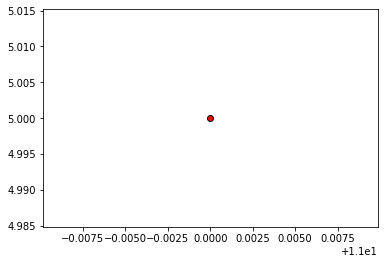

In [50]:
def form_linearly_separable_data(n=500,X1_min=0,X1_max = 30, 
                                 X2_min =0,X2_max = 30):
    data,target = [],[]
    for i in range(n):
        X1 = np.random.randint(X1_min,X1_max)
        X2 = np.random.randint(X2_min,X2_max)
        if np.abs(X1-X2 > 0.5):
            data.append([X1,X2])
            target.append(np.sign(X1-X2))
        return np.array(data),np.array(target)
X,y = form_linearly_separable_data()
plt.scatter(X[:,0],X[:, 1],c= y, cmap = 'autumn', edgecolors  = 'black')